In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('neural_nets')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from nn import NeuralNet
from layers import Dense, Dropout, BatchNormalization
from optimizers import SGD, RMSProp, Adam
from losses import Softmax
from activations import ReLU

# For mnist data
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


In [4]:
m, n = X_train.shape
lr = 0.01
num_iter = 10
print_verbose = 1

loss = Softmax()
optimizer = SGD(lr)
# optimizer = Adam()

model = NeuralNet(loss, optimizer)
model.add(Dense(n, 16))
model.add(ReLU())
model.add(Dense(16, 16))
model.add(ReLU())
model.add(Dense(16, 10))

Iteration : 0, Loss : 0.9026503072562031
Iteration : 1, Loss : 0.3581277838231262
Iteration : 2, Loss : 0.3016084642100701
Iteration : 3, Loss : 0.2720369459193424
Iteration : 4, Loss : 0.25075025615004704
Iteration : 5, Loss : 0.23364677093050748
Iteration : 6, Loss : 0.21946630855431706
Iteration : 7, Loss : 0.2073318363997292
Iteration : 8, Loss : 0.19706044949667703
Iteration : 9, Loss : 0.18834702631755051


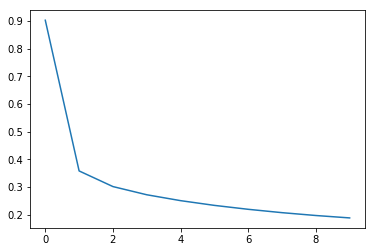

In [5]:
losses = model.train(X_train, y_train, n_iter=num_iter, print_verbose=print_verbose)
plt.plot(range(num_iter), losses);

In [6]:
preds = model.predict(X_test)
(preds == y_test).mean()

0.9419

In [7]:
# Keras way
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32)

score = model.evaluate(X_test, y_test)

print("Test score : ", score[0])
print("Test accuracy : ", score[1])

Epoch 1/10
60000/60000 [==============================] - 7s 123us/step - loss: 0.8454 - acc: 0.7436
Epoch 2/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.3761 - acc: 0.8910
Epoch 3/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.3188 - acc: 0.9077
Epoch 4/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.2879 - acc: 0.9172
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.2651 - acc: 0.9235
Epoch 6/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2481 - acc: 0.9275
Epoch 7/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2344 - acc: 0.9317
Epoch 8/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2230 - acc: 0.9359
Epoch 9/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.2138 - acc: 0.9386
Epoch 10/10
10000/10000 [==============================] - 1s 52us/step
Test score :  0.20350565410

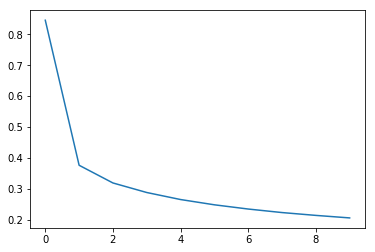

In [8]:
plt.plot(history.history['loss'])